In [68]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.size

800

In [6]:
df.shape

(200, 4)

In [7]:
df.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

# EDA

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

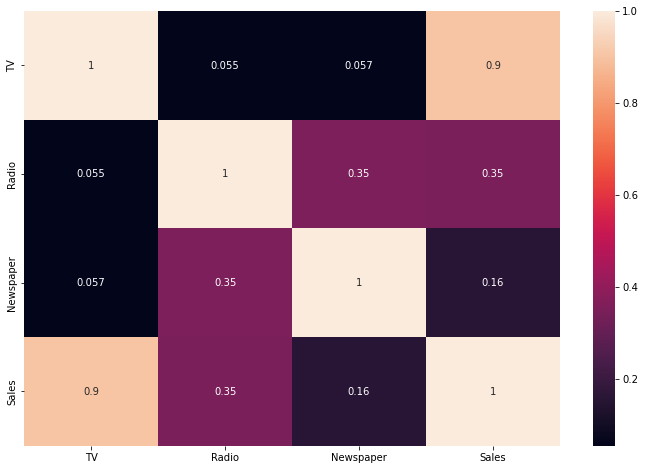

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [11]:
corr_max=df.corr()

In [12]:
corr_max["Sales"].sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

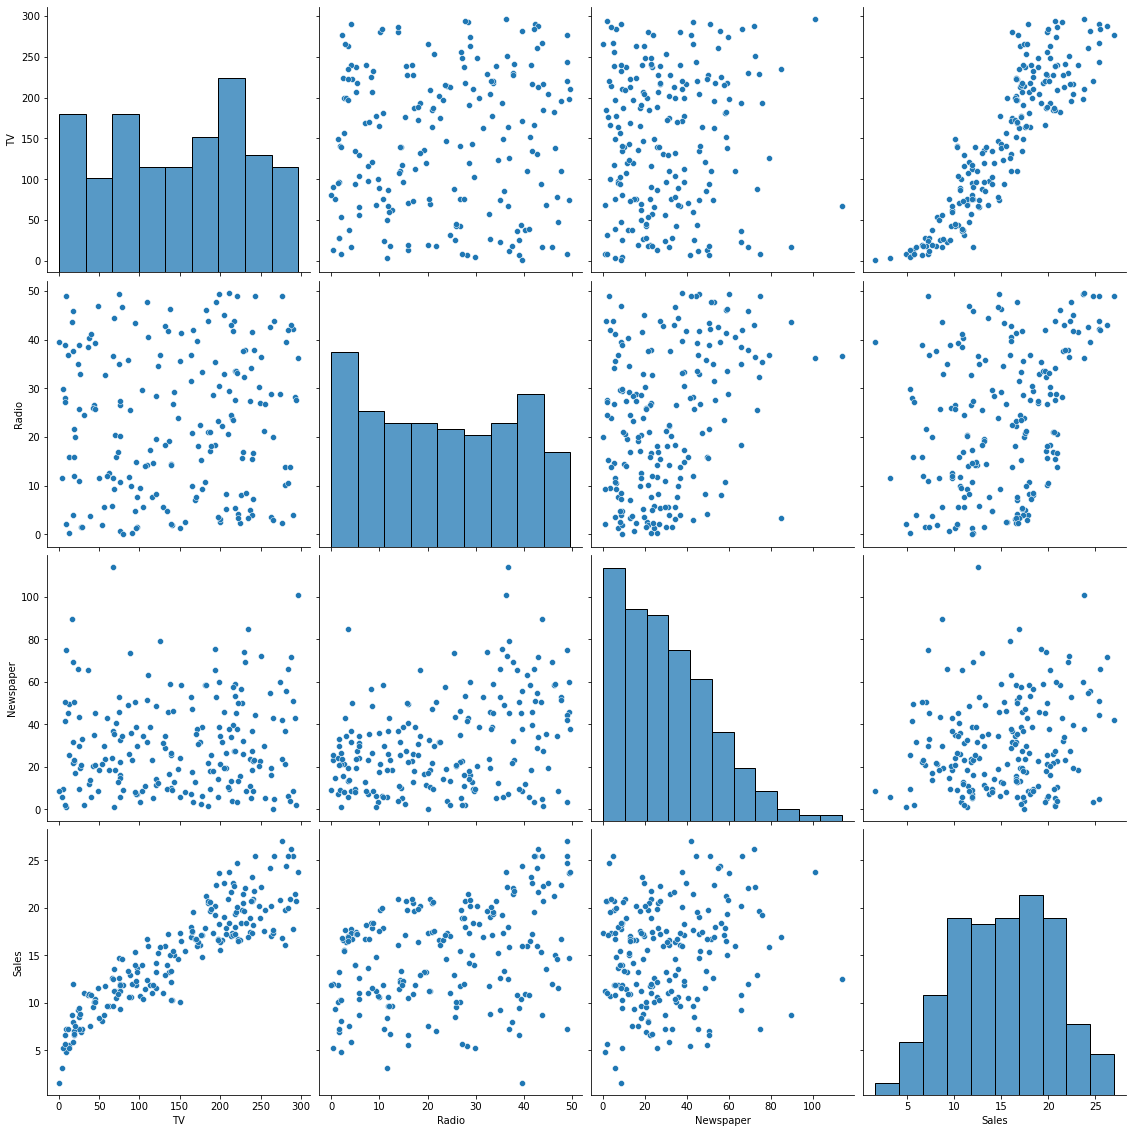

In [13]:
sns.pairplot(df, height=4, aspect=1, kind="scatter")
plt.show()

# ML Model Building

## Standardization of Data

In [16]:
X=df.drop('Sales',axis=1)
y=df['Sales']

In [17]:
from sklearn.preprocessing import StandardScaler
# define StandScaler scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
Reg_predict=reg.predict(X_test)

In [19]:
reg.score(X_train, y_train)

0.9001416005862131

In [20]:
reg.score(X_test, y_test)

0.9059011844150826

## 1.Simple Linear Regression 

In [21]:
# Setting the values for X and y
X=df['TV'].values.reshape(-1,1)
y=df['Sales'].values

In [22]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
A=LinearRegression()
A.fit(X_train,y_train)

LinearRegression()

In [24]:
# Printing the model coefficients
print("intercepts:",A.intercept_)
print("coefficents:",A.coef_)

intercepts: 7.007108428241857
coefficents: [0.05548294]


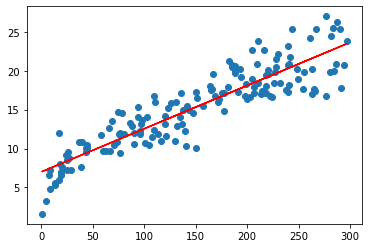

In [25]:
# Line of best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,7.007108428241851+0.05548294*X_train,"r")
plt.show()

In [26]:
# Prediction of Test and Training set 
y_pred_A=A.predict(X_test)
X_pred_A=A.predict(X_train)

In [27]:
# Actual value and predicted value # Understanding purpose
A_diff=pd.DataFrame({"Actual value": y_test, "Predicted value": y_pred_A})
A_diff

,Actual value,Predicted value
0,16.9,16.067473
1,22.4,17.848476
2,21.4,23.258063
3,7.3,7.656259
4,24.7,19.230001
5,12.6,11.173878
6,22.3,19.035811
7,8.4,9.781256
8,16.5,19.346515
9,16.1,16.722172


In [30]:
# MSE
from sklearn.metrics import mean_squared_error

In [32]:
mean_squared_error(y_train,X_pred_A)

4.998442356450174

In [31]:
mean_squared_error(y_test,y_pred_A)

6.101072906773963

In [28]:
# R2 Score
from sklearn.metrics import r2_score

0.802561303423698

In [29]:
r2_score(y_train,X_pred_A)

0.8134866044709264

In [33]:
r2_score(y_test,y_pred_A)

0.802561303423698

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [35]:
# For training
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(reg,X_train,y_train, scoring='r2', cv=folds)
print('scores-',scores)
accuracy_fold=np.mean(abs(scores))
print('train accuracy=',accuracy_fold)

scores- [0.50981951 0.81647631 0.81896281 0.84520992 0.59665014 0.7710171
 0.80619948 0.86086556 0.78759609 0.8041359 ]
train accuracy= 0.761693280697842


In [36]:
# For Testing
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(reg,X_test,y_test, scoring='r2', cv=folds)
print('scores-',scores)
accuracy_fold=np.mean(abs(scores))
print('test accuracy=',accuracy_fold)

scores- [ 0.90191146  0.39306181  0.87454598  0.2292687   0.91921104  0.80071426
  0.6682406   0.74118307  0.7784379  -3.32930853]
test accuracy= 0.9635883346150574


# Multiple Linear regression

In [43]:
X=df.iloc[:,:-1].values # df[["TV","Newspaper","Radio"]].values
y=df["Sales"].values

In [44]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression
A=LinearRegression()
A.fit(X_train,y_train)

LinearRegression()

In [46]:
# Printing the model coefficients
print("intercepts:",A.intercept_)
print("coefficents:",A.coef_)

intercepts: 4.71412640221414
coefficents: [0.05450927 0.10094536 0.00433665]


In [47]:
# Prediction of Test and Training set 
y_pred_A=A.predict(X_test)
X_pred_A=A.predict(X_train)

In [48]:
# MSE
from sklearn.metrics import mean_squared_error

In [49]:
mean_squared_error(y_test,y_pred_A)

2.9077569102710923

In [50]:
mean_squared_error(y_train,X_pred_A)

2.676142653782669

In [51]:
# R2 Score
from sklearn.metrics import r2_score

In [52]:
r2_score(y_train,X_pred_A)

0.9001416005862131

In [53]:
r2_score(y_test,y_pred_A)

0.9059011844150826

## Regularization By Ridge(L2) and Elastic  Net Techniques

In [54]:
# Ridge(L2)
from sklearn import linear_model
ridge_reg= linear_model.Ridge(alpha=500, max_iter=100, tol=0.01)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=500, max_iter=100, tol=0.01)

In [56]:
ridge_reg.score(X_train, y_train)

0.9001226569706746

In [57]:
ridge_reg.score(X_test, y_test)

0.9052605120287722

In [59]:
# Elastic Net
from sklearn.linear_model import ElasticNet
en_mod = ElasticNet(alpha=0.02)
en_mod.fit(X_train, y_train)
en_model_pred = en_mod.predict(X_test)

In [60]:
en_mod.score(X_train, y_train)

0.9001415783595452

In [61]:
en_mod.score(X_test, y_test)

0.9058946803910615

In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [64]:
# For Training
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(A,X_train,y_train, scoring='r2', cv=folds)
print('scores-',scores)
accuracy_fold=np.mean(abs(scores))
print('train accuracy=',accuracy_fold)

scores- [0.77591526 0.77347135 0.90479232 0.79807287 0.87290686 0.8559674
 0.86766024 0.95876795 0.91073047 0.94970914]
train accuracy= 0.866799386620225


In [65]:
# For Testing
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(A,X_test,y_test, scoring='r2', cv=folds)
print('scores-',scores)
accuracy_fold=np.mean(abs(scores))
print('test accuracy=',accuracy_fold)

scores- [0.89119623 0.84408993 0.96772375 0.57325383 0.78669644 0.9234091
 0.8810221  0.9128908  0.8837014  0.58084923]
test accuracy= 0.8244832807644098


In [67]:
# CV Mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

A = LinearRegression()
scores = cross_val_score(A, X_train, y_train, scoring='r2', cv=10)
print('scores',scores)
accuracy_regfold=np.mean(abs(scores))
print('\nCV mean',accuracy_regfold)

scores [0.79519205 0.90506368 0.84807973 0.88751755 0.89198909 0.8951083
 0.87321887 0.94094926 0.82690611 0.88999649]

CV mean 0.8754021131082462
